In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# EDA

## Q1

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')

In [3]:
churn

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

## Q2

In [4]:
churn.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [5]:
churn.tail(10)

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
9990       9991    15798964   Nkemakonam          714   Germany    Male   33   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
9993       9994    15569266       Rahman          644    France    Male   28   
9994       9995    15719294         Wood          800    France  Female   29   
9995       9996    15606229     Obijiaku          771    France    Male   39   
9996       9997    15569892    Johnstone          516    France    Male   35   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   
9999      10000    15628319       Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9990       3   35016.60              1          1               0   
9991       4   88381.21              1          1               0   
9992       2       0.00              1          1               0   
9993       7  155060.41              1          1               0   
9994       2       0.00              2          0               0   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9990         53667.08       0  
9991         69384.71       1  
9992        195192.40       0  
9993         29179.52       0  
9994        167773.55       0  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [6]:
churn.sample(10)

RowNumber  CustomerId          Surname  CreditScore Geography  Gender  \
6814       6815    15665943              Mai          445    France    Male   
6506       6507    15702095           Clarke          585     Spain  Female   
6011       6012    15783007           Parker          520   Germany  Female   
4627       4628    15715744        Schiavone          605    France    Male   
503         504    15730059          Udobata          638     Spain    Male   
8876       8877    15712807        Robertson          556     Spain    Male   
8852       8853    15752097  Chiazagomekpere          708     Spain    Male   
7349       7350    15717629         Docherty          632   Germany    Male   
5988       5989    15809227         Chukwudi          850    France    Male   
6019       6020    15697045           Pisani          726     Spain  Female   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6814   25       6       0.00              2          1               0   
6506   56       1  128472.80              1          1               0   
6011   45       1  123086.39              1          1               1   
4627   39       7       0.00              1          0               1   
503    44       9   77637.35              2          1               1   
8876   46       3  131764.96              1          1               1   
8852   38       8   99640.89              1          1               0   
7349   42       6   59972.26              2          0               1   
5988   35       2       0.00              2          1               1   
6019   35       9       0.00              2          0               1   

      EstimatedSalary  Exited  
6814        119425.94       0  
6506        186476.91       1  
6011         41042.40       1  
4627        119348.28       0  
503         111346.22       0  
8876        108500.66       1  
8852         12429.22       0  
7349        148172.94       0  
5988         56991.66       0  
6019        100556.98       0

## Q3

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

## Q4

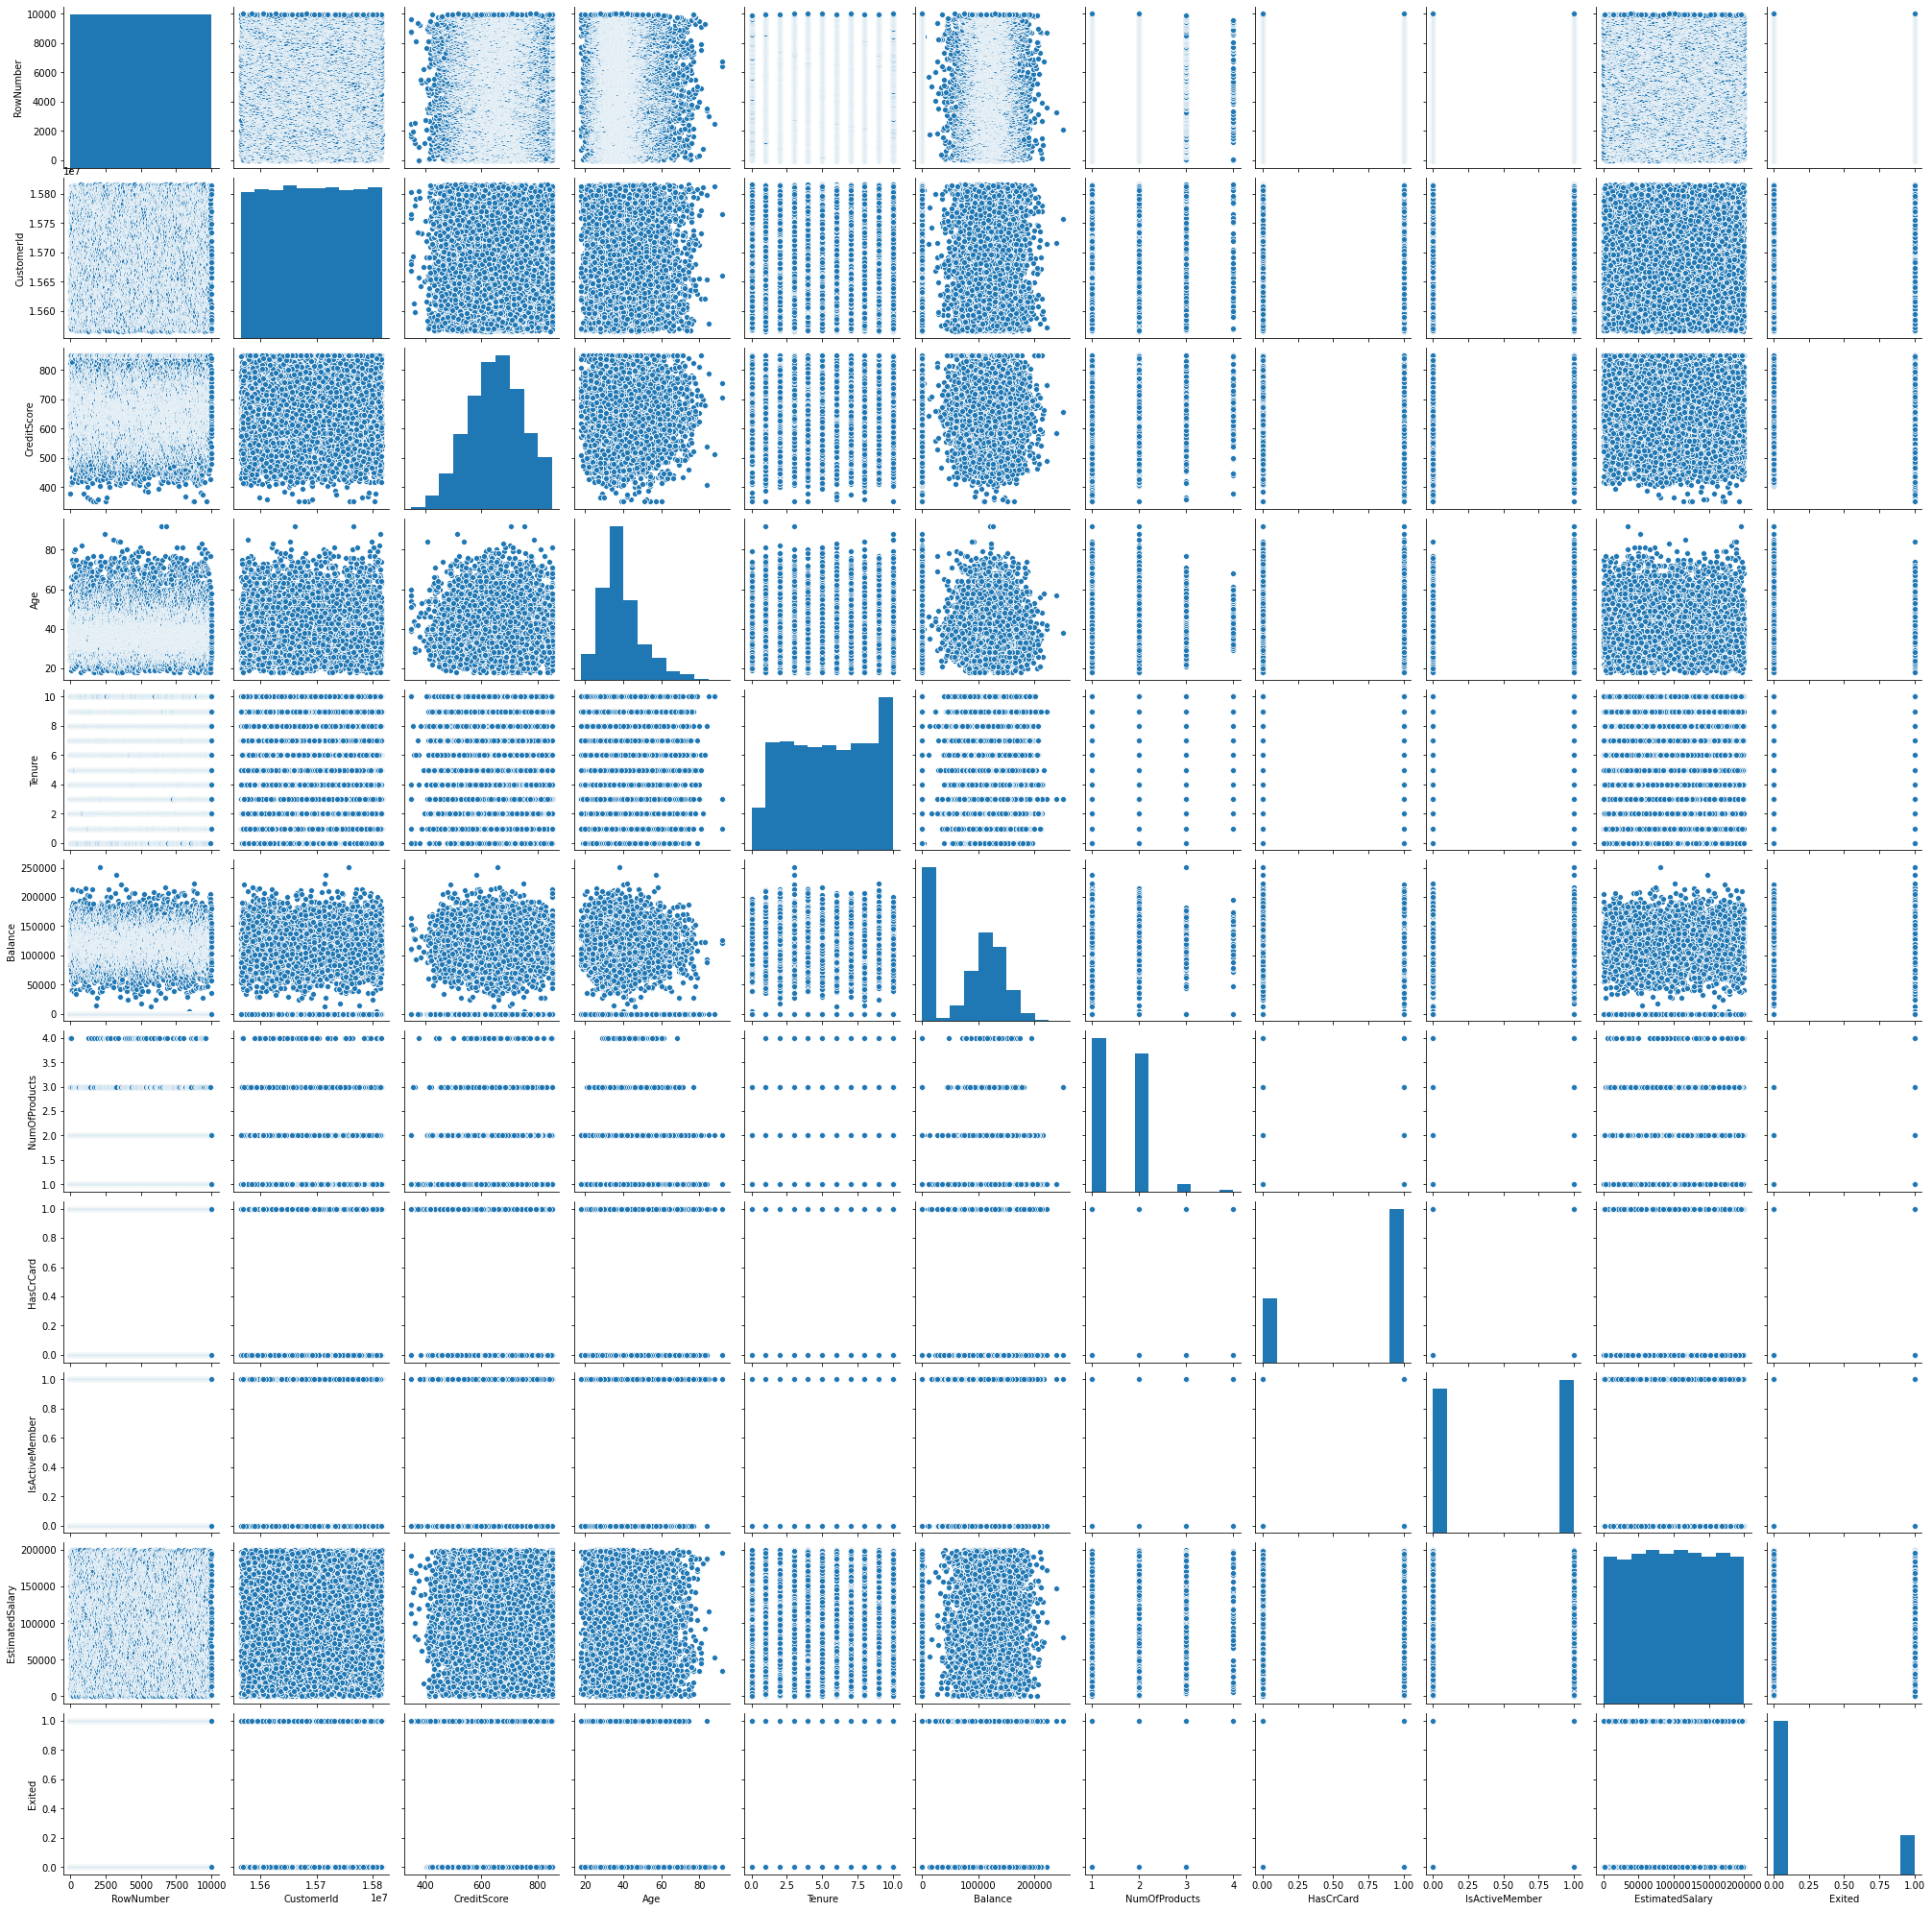

In [9]:
sns.pairplot(churn)

## Q5

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
def findUnique(df):
    for i in df.columns:
        print(i,":",len(df[i].unique()))

In [12]:
findUnique(churn)

RowNumber : 10000
CustomerId : 10000
Surname : 2932
CreditScore : 460
Geography : 3
Gender : 2
Age : 70
Tenure : 11
Balance : 6382
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 9999
Exited : 2


## Q6

In [13]:
churn

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [14]:
df=churn.drop(['RowNumber','CustomerId'],axis=1)

In [15]:
df

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 12 columns]

## Q7

In [16]:
def plotMultiDistplot(df):
    count=0
    colList=[]
    for x in df.columns:
        if (df[x].dtype=='float64' or df[x].dtype =='int64') and len(df[x].unique())>2 : 
            count+=1
            colList.append(x)
    row=round(count/2)
    fig, axs = plt.subplots(row, 2,figsize=(18,row*4),gridspec_kw={'hspace':0.4, 'wspace': 0.2})
    for i in range(row):
        for j in range(2):
            if len(colList)!=0:
                colName=colList.pop()
                sns.distplot(ax=axs[i,j],a=df[colName])
                axs[i,j].set_title(colName)

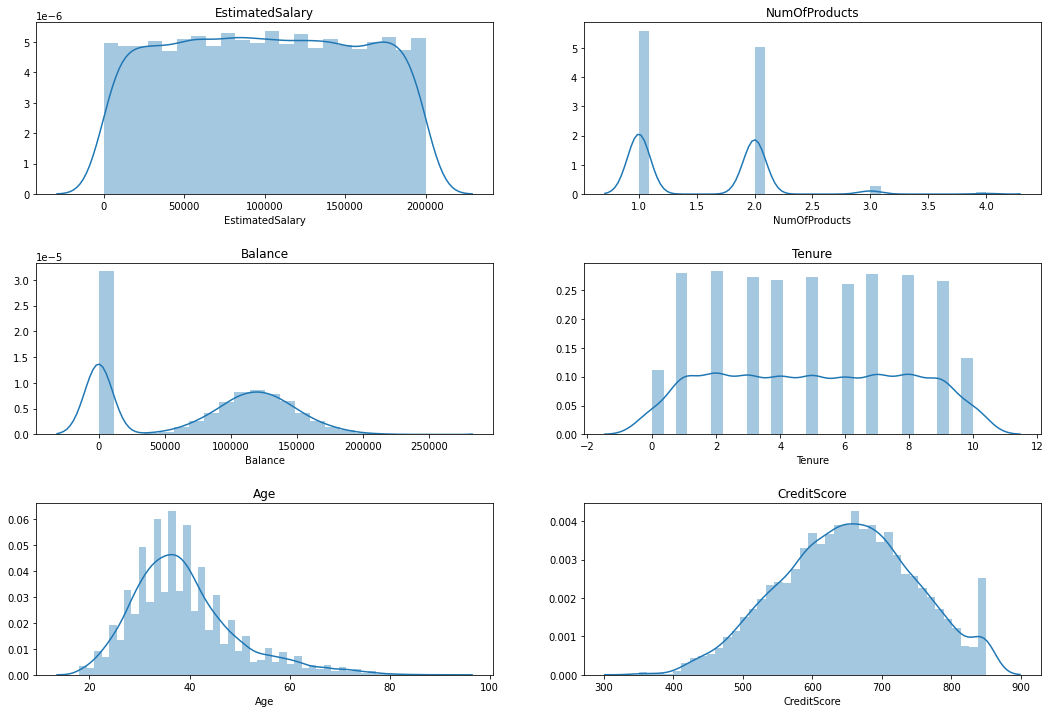

In [17]:
plotMultiDistplot(df)

## Q8

<AxesSubplot:xlabel='Balance'>

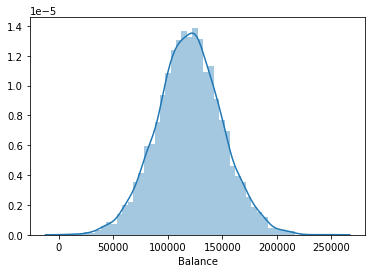

In [18]:
sns.distplot(df[df['Balance']!=0]['Balance'])

## Q9

<AxesSubplot:xlabel='Geography', ylabel='count'>

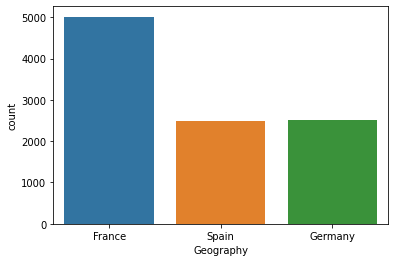

In [19]:
sns.countplot(df['Geography'])

## Q10

<AxesSubplot:xlabel='Gender', ylabel='count'>

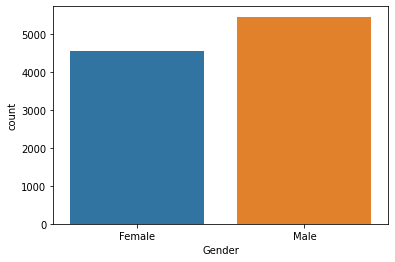

In [20]:
sns.countplot(df['Gender'])

## Q11

In [21]:
print('There are',len(df['Surname'].unique()),'unique surname.')

There are 2932 unique surname.


In [22]:
print('Unique surnames:',[x for x in df['Surname'].unique()])

Unique surnames: ['Hargrave', 'Hill', 'Onio', 'Boni', 'Mitchell', 'Chu', 'Bartlett', 'Obinna', 'He', 'H?', 'Bearce', 'Andrews', 'Kay', 'Chin', 'Scott', 'Goforth', 'Romeo', 'Henderson', 'Muldrow', 'Hao', 'McDonald', 'Dellucci', 'Gerasimov', 'Mosman', 'Yen', 'Maclean', 'Young', 'Nebechi', 'McWilliams', 'Lucciano', 'Azikiwe', 'Odinakachukwu', 'Sanderson', 'Maggard', 'Clements', 'Lombardo', 'Watson', 'Lorenzo', 'Armstrong', 'Cameron', 'Hsiao', 'Clarke', 'Osborne', 'Lavine', 'Bianchi', 'Tyler', 'Martin', 'Okagbue', 'Yin', 'Buccho', 'Chidiebele', 'Trevisani', "O'Brien", 'Parkhill', 'Yoo', 'Phillipps', 'Tsao', 'Endrizzi', "T'ien", 'Velazquez', 'Hunter', 'Clark', 'Jeffrey', 'Pirozzi', 'Jackson', 'Hammond', 'Brownless', 'Chibugo', 'Glauert', 'Pisano', 'Konovalova', 'McKee', 'Palermo', 'Ballard', 'Wallace', 'Cavenagh', 'Hu', 'Read', 'Bushell', 'Postle', 'Buley', 'Leonard', 'Mills', 'Onyeorulu', 'Beit', 'Ndukaku', 'Gant', 'Rowley', 'Sharpe', 'Heap', 'Ritchie', 'Cole', 'Capon', 'Fiorentini', 'Grah

## Q12

In [23]:
df_surname=pd.DataFrame(data=df['Surname'].value_counts())

In [24]:
df_sameSurname=df_surname[df_surname.Surname!=1]

In [25]:
dupSurname=list(df_sameSurname.index)

In [26]:
print(len(dupSurname))

1374


In [27]:
print(dupSurname)

['Smith', 'Scott', 'Martin', 'Walker', 'Brown', 'Shih', 'Genovese', 'Yeh', 'Maclean', 'Wright', 'Fanucci', 'Ma', 'White', 'Wilson', 'Johnson', 'Wang', 'Chu', 'Lu', 'Moore', 'Thompson', 'McGregor', 'Sun', 'Mai', 'Jamieson', 'Young', 'Kerr', 'Shen', 'Kennedy', 'Fang', 'Watson', 'Trevisani', 'Palerma', 'Kao', 'Miller', 'Hughes', 'Lo', 'Graham', 'Mitchell', 'Bergamaschi', "Ts'ui", 'McDonald', 'Pai', 'Wallace', 'Tuan', 'Crawford', 'Anderson', 'Cameron', 'Ko', 'Duncan', 'Wei', 'H?', 'Lung', 'McKay', 'Pan', 'Gordon', 'Burns', 'Tu', 'Fleming', 'Sung', "T'ien", 'Ross', 'He', 'Tien', 'Mao', 'Hsia', 'Lin', 'King', 'Tang', 'Hsing', 'Gibson', 'Manna', 'Davidson', 'Johnston', 'Wan', 'Greco', "Ch'ang", 'Chung', 'Endrizzi', 'Cocci', 'Boyle', 'McIntyre', "P'eng", 'Feng', 'Grant', 'Findlay', 'Chiu', 'Shaw', 'Tsao', 'Hill', 'Manfrin', 'Chin', 'Su', 'Pisano', 'Wu', "Ch'iu", 'Ku', 'Henderson', 'Calabresi', 'Clark', 'Johnstone', 'Kung', 'Hsieh', 'Stevenson', 'Fu', 'Ferri', 'Robertson', 'McKenzie', 'Trevisan

## Q13

In [28]:
sameSurname_top15=df_sameSurname.head(15)
sameSurname_top15

Surname
Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
Shih           25
Genovese       25
Yeh            25
Maclean        24
Wright         24
Fanucci        23
Ma             23
White          23
Wilson         23
Johnson        22

<AxesSubplot:ylabel='Surname'>

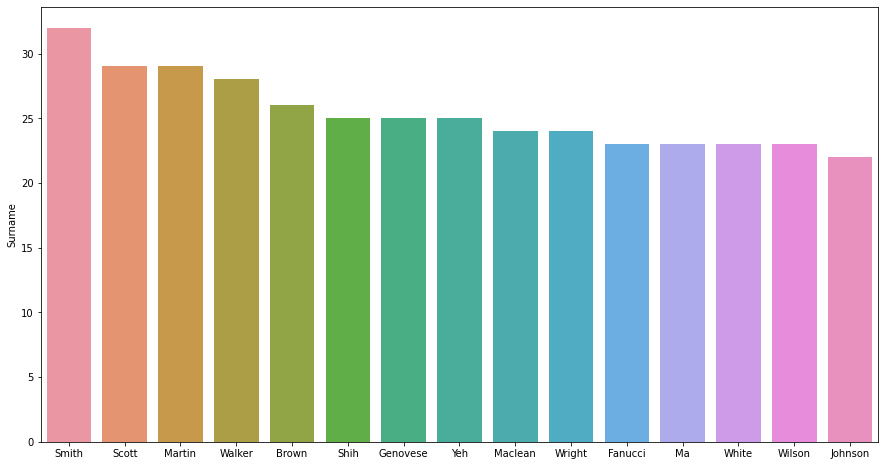

In [29]:
fig=plt.figure(figsize=(15,8))
sns.barplot(x=sameSurname_top15.index,y=sameSurname_top15.Surname)

In [30]:
sameSurname_top15=sameSurname_top15.sort_values(by='Surname', ascending=True)

<AxesSubplot:ylabel='Surname'>

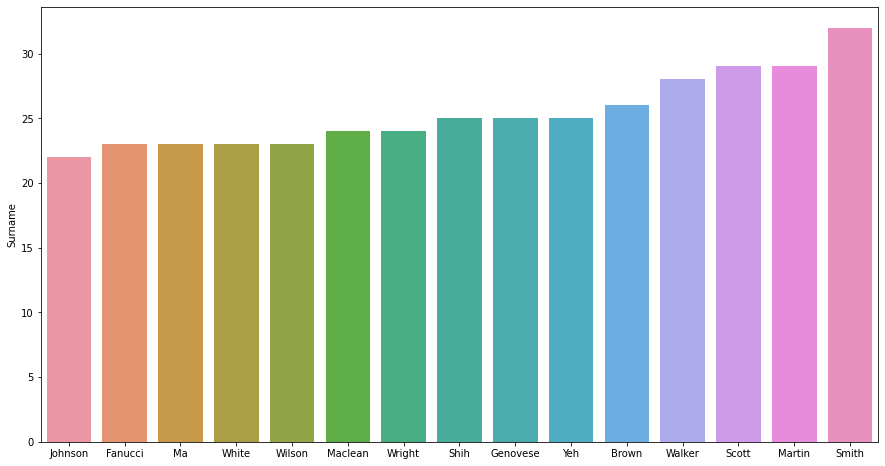

In [31]:
fig=plt.figure(figsize=(15,8))
sns.barplot(x=sameSurname_top15.index,y=sameSurname_top15.Surname)

## Q14

In [32]:
df.corr()

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

## Q15

<AxesSubplot:>

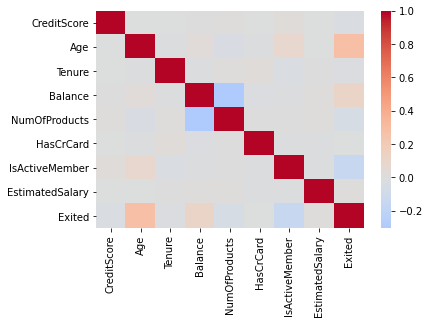

In [33]:
sns.heatmap(df.corr(),center=0,cmap='coolwarm')

## Q16

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

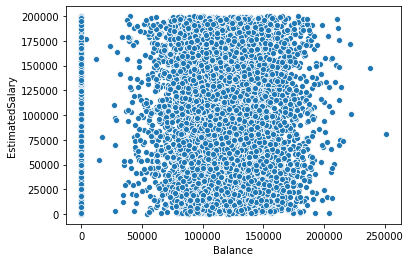

In [34]:
sns.scatterplot(x='Balance',y='EstimatedSalary',data=df)

## Q17

<AxesSubplot:xlabel='Balance', ylabel='EstimatedSalary'>

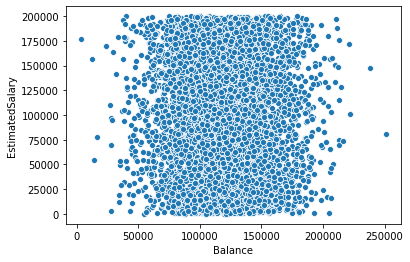

In [35]:
sns.scatterplot(x='Balance',y='EstimatedSalary',data=df[df.Balance!=0])

## Q18

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

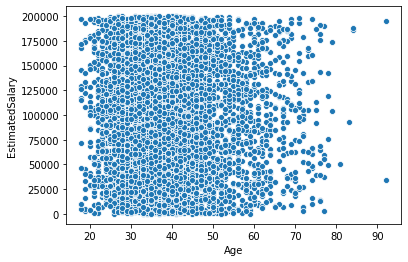

In [36]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df[df.Balance!=0])

## Q19

<AxesSubplot:xlabel='Geography', ylabel='count'>

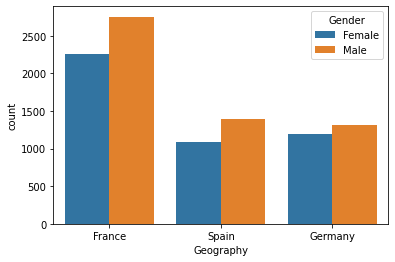

In [37]:
sns.countplot(x=df.Geography,hue=df.Gender)

## Q20

In [38]:
df_genByGeo=df.groupby(['Gender','Geography']).count()
df_genByGeo

Surname  CreditScore   Age  Tenure  Balance  NumOfProducts  \
Gender Geography                                                               
Female France        2261         2261  2261    2261     2261           2261   
       Germany       1193         1193  1193    1193     1193           1193   
       Spain         1089         1089  1089    1089     1089           1089   
Male   France        2753         2753  2753    2753     2753           2753   
       Germany       1316         1316  1316    1316     1316           1316   
       Spain         1388         1388  1388    1388     1388           1388   

                  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
Gender Geography                                                      
Female France          2261            2261             2261    2261  
       Germany         1193            1193             1193    1193  
       Spain           1089            1089             1089    1089  
Male   France          2753            2753             2753    2753  
       Germany         1316            1316             1316    1316  
       Spain           1388            1388             1388    1388

In [39]:
df_genByGeo['Count']=df_genByGeo.Age

In [40]:
df_genByGeo=df_genByGeo.drop(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],axis=1)
df_genByGeo

Count
Gender Geography       
Female France      2261
       Germany     1193
       Spain       1089
Male   France      2753
       Germany     1316
       Spain       1388

## Q21

In [41]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [42]:
print('% of churn customer is',100*df.Exited.value_counts()[1]/(df.Exited.value_counts()[0]+df.Exited.value_counts()[1]),"%")

% of churn customer is 20.37 %


## Q22

In [43]:
import plotly.express as px

In [44]:
df_pie1=df.groupby(['Geography']).sum().drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],axis=1)

In [45]:

fig = px.pie(values=df_pie1.Exited, names=df_pie1.index)
fig.show()

## Q23

In [46]:
fig = px.bar(y=df_pie1.Exited, x=df_pie1.index)
fig.show()

# Q24

In [47]:
df_churnByGeo=df.groupby(['Geography']).count()
df_churnByGeo=df_churnByGeo.drop(['Surname', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],axis=1)
df_churnByGeo

Exited
Geography        
France       5014
Germany      2509
Spain        2477

In [48]:
df_churnByGeo.columns=['Number of Customer']
df_churnByGeo['Exited']=df_pie1.Exited
df_churnByGeo

Number of Customer  Exited
Geography                            
France                   5014     810
Germany                  2509     814
Spain                    2477     413

In [49]:
df_churnByGeo['% of Churn customer']=100*df_churnByGeo.Exited/df_churnByGeo['Number of Customer']
df_churnByGeo

Number of Customer  Exited  % of Churn customer
Geography                                                 
France                   5014     810            16.154767
Germany                  2509     814            32.443204
Spain                    2477     413            16.673395

## Q25

In [50]:
fig = px.pie(values=[df_churnByGeo['Number of Customer'][0]-df_pie1.Exited[0],df_pie1.Exited[0]], 
             names=['Not churn','Churn'],
             title=df_churnByGeo.index[0])
fig.show()

In [51]:
fig = px.pie(values=[df_churnByGeo['Number of Customer'][1]-df_pie1.Exited[1],df_pie1.Exited[1]], 
             names=['Not churn','Churn'],
             title=df_churnByGeo.index[1])
fig.show()

In [52]:
fig = px.pie(values=[df_churnByGeo['Number of Customer'][2]-df_pie1.Exited[2],df_pie1.Exited[2]], 
             names=['Not churn','Churn'],
             title=df_churnByGeo.index[2])
fig.show()

## Q26

In [53]:
fig = px.histogram(df[df.Exited==1], x="Age")
fig.show()

40s customer churnมากที่สุด

## Q27

In [54]:
fig = px.scatter(df[(df.Age>=18) & (df.Age<=27)], x="Age", y="EstimatedSalary",size="Balance", color="CreditScore",
                 log_y=True, size_max=20)
fig.show()

## Q28

In [55]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [56]:
df_churnByNumPro=df.groupby(['NumOfProducts']).count()
df_churnByNumPro=df_churnByNumPro.drop(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],axis=1)
df_churnByNumPro

Exited
NumOfProducts        
1                5084
2                4590
3                 266
4                  60

In [57]:
df_churnByNumPro.columns=['NumOfCustomer']
tmp=df.groupby(['NumOfProducts']).sum()
tmp

CreditScore     Age  Tenure       Balance  HasCrCard  \
NumOfProducts                                                         
1                  3300131  201698   25291  5.010377e+08       3578   
2                  2993546  173289   23188  2.381253e+08       3246   
3                   172396   11490    1331  2.007192e+07        190   
4                    39215    2741     318  5.623988e+06         41   

               IsActiveMember  EstimatedSalary  Exited  
NumOfProducts                                           
1                        2563     5.057932e+08    1409  
2                        2446     4.610747e+08     348  
3                         113     2.774862e+07     220  
4                          29     6.285823e+06      60

In [58]:
df_churnByNumPro['Exited']=tmp.Exited
df_churnByNumPro

NumOfCustomer  Exited
NumOfProducts                       
1                       5084    1409
2                       4590     348
3                        266     220
4                         60      60

In [59]:
df_churnByNumPro['% of Churn customer']=100*df_churnByNumPro.Exited/df_churnByNumPro['NumOfCustomer']
df_churnByNumPro

NumOfCustomer  Exited  % of Churn customer
NumOfProducts                                            
1                       5084    1409            27.714398
2                       4590     348             7.581699
3                        266     220            82.706767
4                         60      60           100.000000

In [60]:
fig = px.bar(y=df_churnByNumPro['% of Churn customer'], x=df_churnByNumPro.index)
fig.show()

มีสมมุติฐานว่าถ้าลูกค้ามีผลิตภัณฑ์น้อยจะมีเปอร์เซ็นออกสูงกว่า เพราะยิ่งมีเยอะน่าจะสื่อได้ว่ามี Brand Loyalty สูง แต่จากผลที่ถ้ากลับตรงกันข้าม

## Q29

In [61]:
df_churnBySex=df.groupby(['Gender']).count()
df_churnBySex=df_churnBySex.drop(['Surname', 'CreditScore', 'Geography', 'NumOfProducts', 'Age', 'Tenure',
       'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],axis=1)
df_churnBySex

Exited
Gender        
Female    4543
Male      5457

In [62]:
df_churnBySex.columns=['NumOfCustomer']
tmp=df.groupby(['Gender']).sum()
tmp

CreditScore     Age  Tenure       Balance  NumOfProducts  HasCrCard  \
Gender                                                                        
Female      2956727  178260   22561  3.437205e+08           7015       3192   
Male        3548561  210958   27567  4.211384e+08           8287       3863   

        IsActiveMember  EstimatedSalary  Exited  
Gender                                           
Female            2284     4.570328e+08    1139  
Male              2867     5.438696e+08     898

In [63]:
df_churnBySex['Exited']=tmp.Exited
df_churnBySex

NumOfCustomer  Exited
Gender                       
Female           4543    1139
Male             5457     898

In [64]:
df_churnBySex['% of Churn customer']=100*df_churnBySex.Exited/df_churnBySex['NumOfCustomer']
df_churnBySex

NumOfCustomer  Exited  % of Churn customer
Gender                                            
Female           4543    1139            25.071539
Male             5457     898            16.455928

In [65]:
fig = px.bar(y=df_churnBySex['% of Churn customer'], x=df_churnBySex.index)
fig.show()

In [66]:
df

Surname  CreditScore Geography  Gender  Age  Tenure    Balance  \
0      Hargrave          619    France  Female   42       2       0.00   
1          Hill          608     Spain  Female   41       1   83807.86   
2          Onio          502    France  Female   42       8  159660.80   
3          Boni          699    France  Female   39       1       0.00   
4      Mitchell          850     Spain  Female   43       2  125510.82   
...         ...          ...       ...     ...  ...     ...        ...   
9995   Obijiaku          771    France    Male   39       5       0.00   
9996  Johnstone          516    France    Male   35      10   57369.61   
9997        Liu          709    France  Female   36       7       0.00   
9998  Sabbatini          772   Germany    Male   42       3   75075.31   
9999     Walker          792    France  Female   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0               1        112542.58       0  
2                 3          1               0        113931.57       1  
3                 2          0               0         93826.63       0  
4                 1          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995              2          1               0         96270.64       0  
9996              1          1               1        101699.77       0  
9997              1          0               1         42085.58       1  
9998              2          1               0         92888.52       1  
9999              1          1               0         38190.78       0  

[10000 rows x 12 columns]

# Handle Outlier

## Q30

In [67]:
import math
def plotMultiBoxplot(df):
    count=0
    colList=[]
    for x in df.columns:
        if (df[x].dtype=='float64' or df[x].dtype =='int64') and len(df[x].unique())>2 : 
            count+=1
            colList.append(x)
    col=math.ceil(count/3)
    fig, axs = plt.subplots(col, 3,figsize=(18,col*8),gridspec_kw={'hspace':0.4, 'wspace': 0.2})
    for i in range(col):
        for j in range(3):
            if len(colList)!=0:
                colName=colList.pop()
                sns.boxplot(ax=axs[i,j],y=df[colName])
                axs[i,j].set_title(colName)

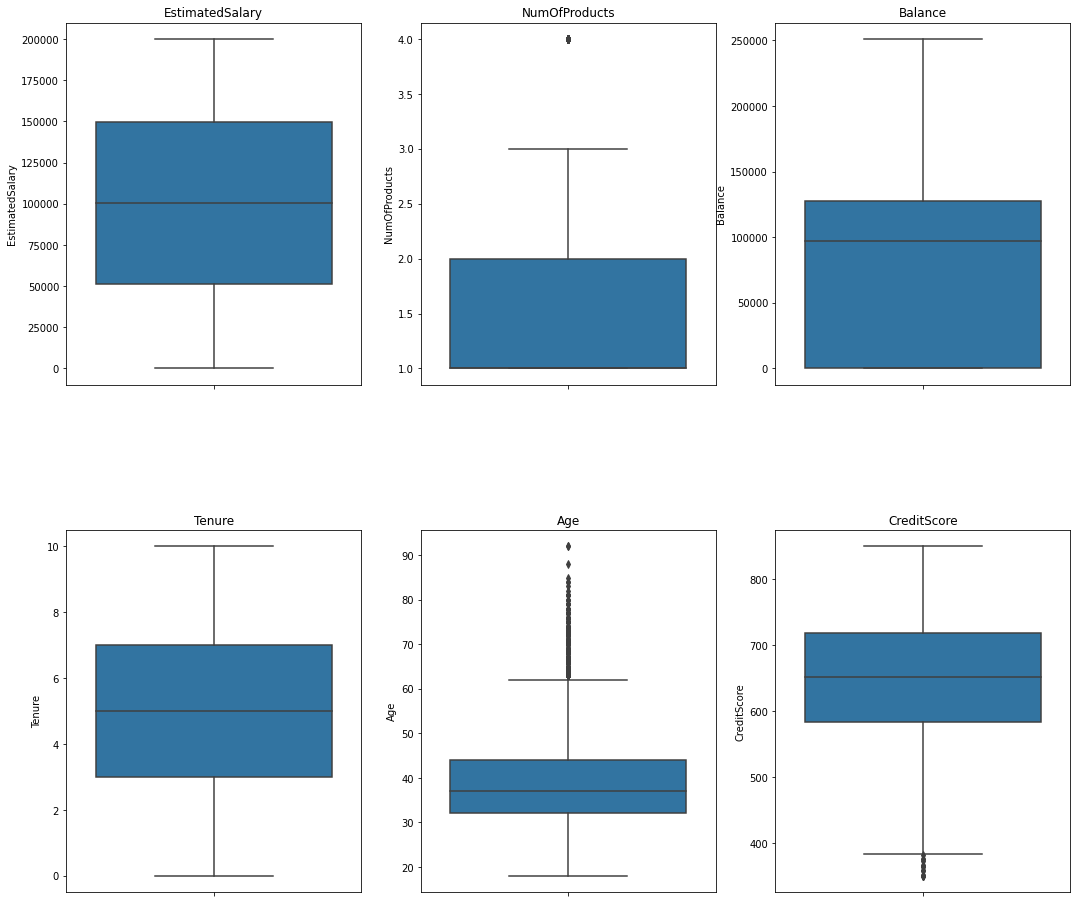

In [68]:
plotMultiBoxplot(df)

In [69]:
df['CreditScore'].quantile(.25)-(1.5*(df['CreditScore'].quantile(.75)-df['CreditScore'].quantile(.25)))

383.0

In [70]:
def replaceOutlier(df):
    df_noOutlier=df
    colList=[]
    for x in df.columns:
        if (df[x].dtype=='float64' or df[x].dtype =='int64') and len(df[x].unique())>2 : 
            colList.append(x)
    for col in colList:
        lowerFence=df[col].quantile(.25)-(1.5*(df[col].quantile(.75)-df[col].quantile(.25)))
        upperFence=df[col].quantile(.75)+(1.5*(df[col].quantile(.75)-df[col].quantile(.25)))
        df_noOutlier.loc[df_noOutlier[df_noOutlier[col]>upperFence].index,col]=upperFence
        df_noOutlier.loc[df_noOutlier[df_noOutlier[col]<lowerFence].index,col]=lowerFence
        print(col,lowerFence,upperFence,df[col].quantile(.25),df[col].quantile(.75))
    return df_noOutlier

In [71]:
df_normal=replaceOutlier(df)
df_normal

CreditScore 383.0 919.0 584.0 718.0
Age 14.0 62.0 32.0 44.0
Tenure -3.0 13.0 3.0 7.0
Balance -191466.36000000002 319110.60000000003 0.0 127644.24
NumOfProducts -0.5 3.5 1.0 2.0
EstimatedSalary -96577.09624999999 296967.45375 51002.11 149388.2475


Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
0      Hargrave        619.0    France  Female  42.0     2.0       0.00   
1          Hill        608.0     Spain  Female  41.0     1.0   83807.86   
2          Onio        502.0    France  Female  42.0     8.0  159660.80   
3          Boni        699.0    France  Female  39.0     1.0       0.00   
4      Mitchell        850.0     Spain  Female  43.0     2.0  125510.82   
...         ...          ...       ...     ...   ...     ...        ...   
9995   Obijiaku        771.0    France    Male  39.0     5.0       0.00   
9996  Johnstone        516.0    France    Male  35.0    10.0   57369.61   
9997        Liu        709.0    France  Female  36.0     7.0       0.00   
9998  Sabbatini        772.0   Germany    Male  42.0     3.0   75075.31   
9999     Walker        792.0    France  Female  28.0     4.0  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0               1.0          1               1        101348.88       1  
1               1.0          0               1        112542.58       0  
2               3.0          1               0        113931.57       1  
3               2.0          0               0         93826.63       0  
4               1.0          1               1         79084.10       0  
...             ...        ...             ...              ...     ...  
9995            2.0          1               0         96270.64       0  
9996            1.0          1               1        101699.77       0  
9997            1.0          0               1         42085.58       1  
9998            2.0          1               0         92888.52       1  
9999            1.0          1               0         38190.78       0  

[10000 rows x 12 columns]

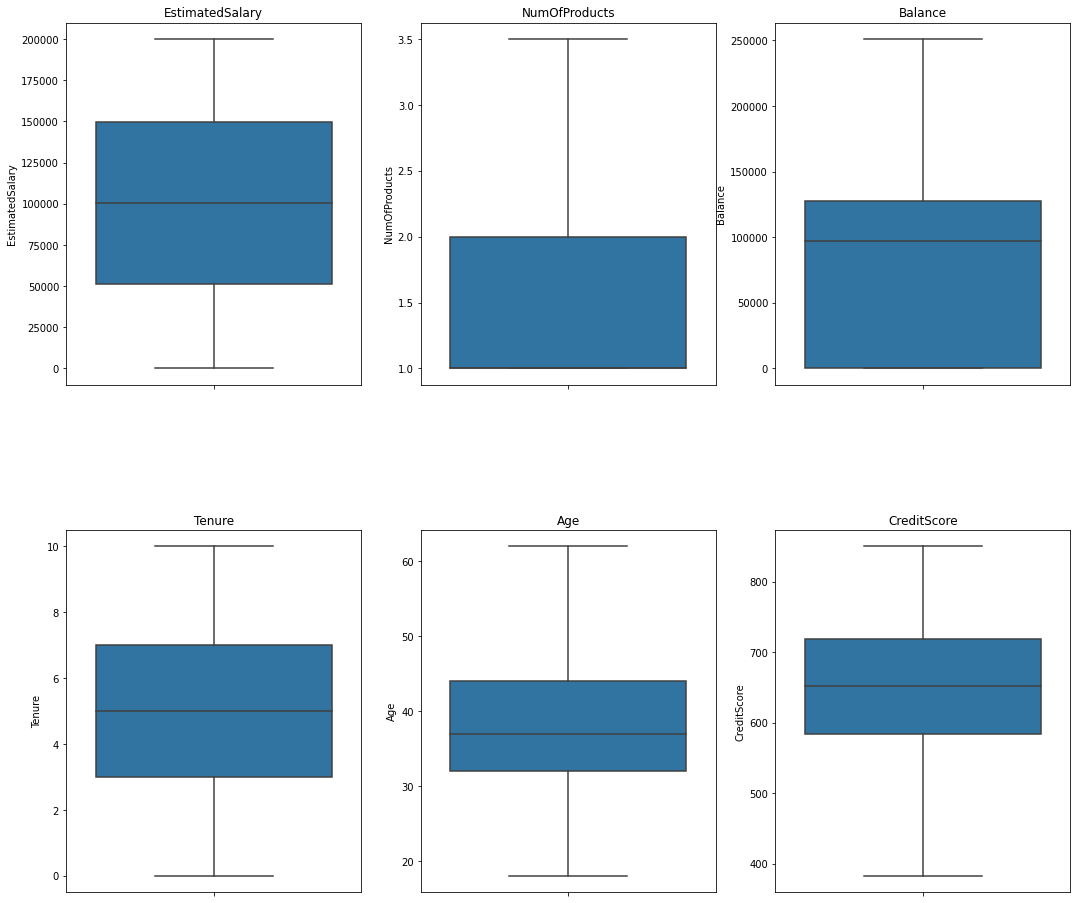

In [72]:
plotMultiBoxplot(df_normal)

## Q32

In [73]:
df_normal.columns=['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn']

In [74]:
df_normal

Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
0      Hargrave        619.0    France  Female  42.0     2.0       0.00   
1          Hill        608.0     Spain  Female  41.0     1.0   83807.86   
2          Onio        502.0    France  Female  42.0     8.0  159660.80   
3          Boni        699.0    France  Female  39.0     1.0       0.00   
4      Mitchell        850.0     Spain  Female  43.0     2.0  125510.82   
...         ...          ...       ...     ...   ...     ...        ...   
9995   Obijiaku        771.0    France    Male  39.0     5.0       0.00   
9996  Johnstone        516.0    France    Male  35.0    10.0   57369.61   
9997        Liu        709.0    France  Female  36.0     7.0       0.00   
9998  Sabbatini        772.0   Germany    Male  42.0     3.0   75075.31   
9999     Walker        792.0    France  Female  28.0     4.0  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0               1.0          1               1        101348.88      1  
1               1.0          0               1        112542.58      0  
2               3.0          1               0        113931.57      1  
3               2.0          0               0         93826.63      0  
4               1.0          1               1         79084.10      0  
...             ...        ...             ...              ...    ...  
9995            2.0          1               0         96270.64      0  
9996            1.0          1               1        101699.77      0  
9997            1.0          0               1         42085.58      1  
9998            2.0          1               0         92888.52      1  
9999            1.0          1               0         38190.78      0  

[10000 rows x 12 columns]

In [75]:
df_normal.Churn.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

## Q33

In [77]:
df_normal=df_normal.drop('Surname',axis=1)
df_normal

CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0           619.0    France  Female  42.0     2.0       0.00            1.0   
1           608.0     Spain  Female  41.0     1.0   83807.86            1.0   
2           502.0    France  Female  42.0     8.0  159660.80            3.0   
3           699.0    France  Female  39.0     1.0       0.00            2.0   
4           850.0     Spain  Female  43.0     2.0  125510.82            1.0   
...           ...       ...     ...   ...     ...        ...            ...   
9995        771.0    France    Male  39.0     5.0       0.00            2.0   
9996        516.0    France    Male  35.0    10.0   57369.61            1.0   
9997        709.0    France  Female  36.0     7.0       0.00            1.0   
9998        772.0   Germany    Male  42.0     3.0   75075.31            2.0   
9999        792.0    France  Female  28.0     4.0  130142.79            1.0   

      HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0             1               1        101348.88      1  
1             0               1        112542.58      0  
2             1               0        113931.57      1  
3             0               0         93826.63      0  
4             1               1         79084.10      0  
...         ...             ...              ...    ...  
9995          1               0         96270.64      0  
9996          1               1        101699.77      0  
9997          0               1         42085.58      1  
9998          1               0         92888.52      1  
9999          1               0         38190.78      0  

[10000 rows x 11 columns]

## Q34

In [82]:
df_dummied=pd.get_dummies(df_normal)
df_dummied

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0     2.0       0.00            1.0          1   
1           608.0  41.0     1.0   83807.86            1.0          0   
2           502.0  42.0     8.0  159660.80            3.0          1   
3           699.0  39.0     1.0       0.00            2.0          0   
4           850.0  43.0     2.0  125510.82            1.0          1   
...           ...   ...     ...        ...            ...        ...   
9995        771.0  39.0     5.0       0.00            2.0          1   
9996        516.0  35.0    10.0   57369.61            1.0          1   
9997        709.0  36.0     7.0       0.00            1.0          0   
9998        772.0  42.0     3.0   75075.31            2.0          1   
9999        792.0  28.0     4.0  130142.79            1.0          1   

      IsActiveMember  EstimatedSalary  Churn  Geography_France  \
0                  1        101348.88      1                 1   
1                  1        112542.58      0                 0   
2                  0        113931.57      1                 1   
3                  0         93826.63      0                 1   
4                  1         79084.10      0                 0   
...              ...              ...    ...               ...   
9995               0         96270.64      0                 1   
9996               1        101699.77      0                 1   
9997               1         42085.58      1                 1   
9998               0         92888.52      1                 0   
9999               0         38190.78      0                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                     0                0              1            0  
1                     0                1              1            0  
2                     0                0              1            0  
3                     0                0              1            0  
4                     0                1              1            0  
...                 ...              ...            ...          ...  
9995                  0                0              0            1  
9996                  0                0              0            1  
9997                  0                0              1            0  
9998                  1                0              0            1  
9999                  0                0              1            0  

[10000 rows x 14 columns]

In [83]:
df_dummied=df_dummied.drop('Churn',axis=1)
df_dummied['Churn']=df.Churn
df_dummied

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0  42.0     2.0       0.00            1.0          1   
1           608.0  41.0     1.0   83807.86            1.0          0   
2           502.0  42.0     8.0  159660.80            3.0          1   
3           699.0  39.0     1.0       0.00            2.0          0   
4           850.0  43.0     2.0  125510.82            1.0          1   
...           ...   ...     ...        ...            ...        ...   
9995        771.0  39.0     5.0       0.00            2.0          1   
9996        516.0  35.0    10.0   57369.61            1.0          1   
9997        709.0  36.0     7.0       0.00            1.0          0   
9998        772.0  42.0     3.0   75075.31            2.0          1   
9999        792.0  28.0     4.0  130142.79            1.0          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        101348.88                 1                  0   
1                  1        112542.58                 0                  0   
2                  0        113931.57                 1                  0   
3                  0         93826.63                 1                  0   
4                  1         79084.10                 0                  0   
...              ...              ...               ...                ...   
9995               0         96270.64                 1                  0   
9996               1        101699.77                 1                  0   
9997               1         42085.58                 1                  0   
9998               0         92888.52                 0                  1   
9999               0         38190.78                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  Churn  
0                   0              1            0      1  
1                   1              1            0      0  
2                   0              1            0      1  
3                   0              1            0      0  
4                   1              1            0      0  
...               ...            ...          ...    ...  
9995                0              0            1      0  
9996                0              0            1      0  
9997                0              1            0      1  
9998                0              0            1      1  
9999                0              1            0      0  

[10000 rows x 14 columns]

## Q35

In [84]:
x_1=df_dummied.drop('Churn',axis=1)
y_1=df_dummied.Churn
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_1,y_1,test_size=0.2,random_state=13)

In [85]:
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


# Logistic Regression (Base)

## Q36

In [86]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr_base=LogisticRegression()

In [89]:
lr_base.fit(x_train_1,y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
lr_base_predicted=lr_base.predict(x_test_1)

## Q37

<AxesSubplot:ylabel='count'>

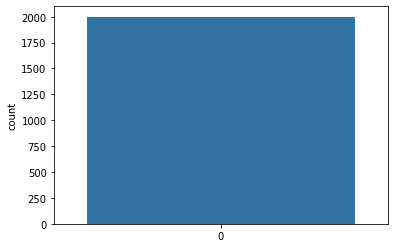

In [91]:
sns.countplot(lr_base_predicted)

## Q38

In [97]:
confusion_matrix(y_test_1,lr_base_predicted)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [98]:
print('Accuracy=',accuracy_score(y_test_1,lr_base_predicted))
print('F1 score=',f1_score(y_test_1,lr_base_predicted))
print('Precision=',precision_score(y_test_1,lr_base_predicted))
print('Recall=',recall_score(y_test_1,lr_base_predicted))

Accuracy= 0.7975
F1 score= 0.0
Precision= 0.0
Recall= 0.0


C:\Users\boont\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [99]:
lr_base_acc=accuracy_score(y_test_1,lr_base_predicted)
lr_base_f1 =f1_score(y_test_1,lr_base_predicted)
lr_base_pre=precision_score(y_test_1,lr_base_predicted)
lr_base_rec=recall_score(y_test_1,lr_base_predicted)

# K-NN (Base) 

## Q39

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn_base= KNeighborsClassifier(n_neighbors=2)

In [102]:
knn_base.fit(x_train_1,y_train_1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [103]:
knn_base_predicted=knn_base.predict(x_test_1)

## Q40

<AxesSubplot:ylabel='count'>

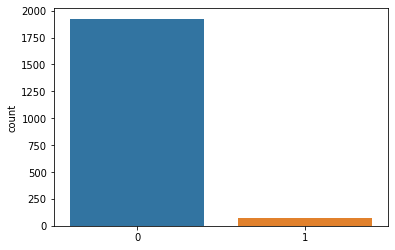

In [105]:
sns.countplot(knn_base_predicted)

## Q41

In [106]:
confusion_matrix(y_test_1,knn_base_predicted)

array([[1541,   54],
       [ 384,   21]], dtype=int64)

In [107]:
print('Accuracy=',accuracy_score(y_test_1,knn_base_predicted))
print('F1 score=',f1_score(y_test_1,knn_base_predicted))
print('Precision=',precision_score(y_test_1,knn_base_predicted))
print('Recall=',recall_score(y_test_1,knn_base_predicted))

Accuracy= 0.781
F1 score= 0.0875
Precision= 0.28
Recall= 0.05185185185185185


In [108]:
knn_base_acc=accuracy_score(y_test_1,knn_base_predicted)
knn_base_f1 =f1_score(y_test_1,knn_base_predicted)
knn_base_pre=precision_score(y_test_1,knn_base_predicted)
knn_base_rec=recall_score(y_test_1,knn_base_predicted)

# SVM (base)

## Q42

In [109]:
from sklearn.svm import SVC

In [110]:
svc_base=SVC()

In [111]:
svc_base.fit(x_train_1,y_train_1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
svc_base_predicted=svc_base.predict(x_test_1)

## Q43

<AxesSubplot:ylabel='count'>

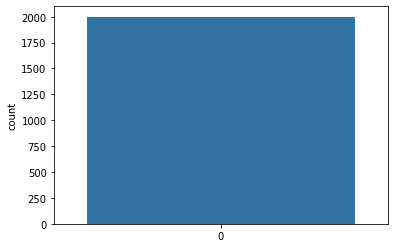

In [113]:
sns.countplot(svc_base_predicted)

## Q44

In [115]:
confusion_matrix(y_test_1,svc_base_predicted)

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [116]:
print('Accuracy=',accuracy_score(y_test_1,svc_base_predicted))
print('F1 score=',f1_score(y_test_1,svc_base_predicted))
print('Precision=',precision_score(y_test_1,svc_base_predicted))
print('Recall=',recall_score(y_test_1,svc_base_predicted))

Accuracy= 0.7975
F1 score= 0.0
Precision= 0.0
Recall= 0.0


C:\Users\boont\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [117]:
svc_base_acc=accuracy_score(y_test_1,svc_base_predicted)
svc_base_f1 =f1_score(y_test_1,svc_base_predicted)
svc_base_pre=precision_score(y_test_1,svc_base_predicted)
svc_base_rec=recall_score(y_test_1,svc_base_predicted)

## Q45

f1 score and precision score use False positive as ตัวเศษ.Therefore, f1 and precision score will be zero since FP is 0. 

recall use f1 and precision score for calculation, so it will be zero if either f1 score or precision score is 0.

# Naive Bayes (Base)

## Q46

In [118]:
nb_base=GaussianNB()

In [119]:
nb_base.fit(x_train_1,y_train_1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
nb_base_predicted=nb_base.predict(x_test_1)

## Q47

<AxesSubplot:ylabel='count'>

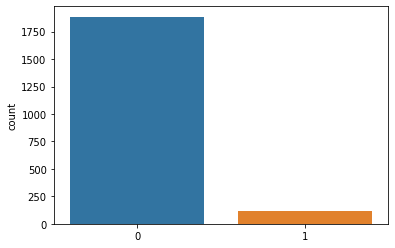

In [121]:
sns.countplot(nb_base_predicted)

## Q48

In [122]:
confusion_matrix(y_test_1,nb_base_predicted)

array([[1530,   65],
       [ 356,   49]], dtype=int64)

In [123]:
print('Accuracy=',accuracy_score(y_test_1,nb_base_predicted))
print('F1 score=',f1_score(y_test_1,nb_base_predicted))
print('Precision=',precision_score(y_test_1,nb_base_predicted))
print('Recall=',recall_score(y_test_1,nb_base_predicted))

Accuracy= 0.7895
F1 score= 0.1888246628131021
Precision= 0.4298245614035088
Recall= 0.12098765432098765


In [124]:
nb_base_acc=accuracy_score(y_test_1,nb_base_predicted)
nb_base_f1 =f1_score(y_test_1,nb_base_predicted)
nb_base_pre=precision_score(y_test_1,nb_base_predicted)
nb_base_rec=recall_score(y_test_1,nb_base_predicted)

# Decision Tree (Base)

## Q49

In [125]:
dt_base=DecisionTreeClassifier()

In [126]:
dt_base.fit(x_train_1,y_train_1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [127]:
dt_base_predicted=dt_base.predict(x_test_1)

## Q50

<AxesSubplot:ylabel='count'>

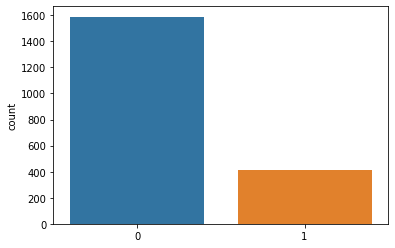

In [129]:
sns.countplot(dt_base_predicted)

## Q51

In [130]:
confusion_matrix(y_test_1,dt_base_predicted)

array([[1377,  218],
       [ 212,  193]], dtype=int64)

In [131]:
print('Accuracy=',accuracy_score(y_test_1,dt_base_predicted))
print('F1 score=',f1_score(y_test_1,dt_base_predicted))
print('Precision=',precision_score(y_test_1,dt_base_predicted))
print('Recall=',recall_score(y_test_1,dt_base_predicted))

Accuracy= 0.785
F1 score= 0.4730392156862745
Precision= 0.46958637469586373
Recall= 0.4765432098765432


In [132]:
dt_base_acc=accuracy_score(y_test_1,dt_base_predicted)
dt_base_f1 =f1_score(y_test_1,dt_base_predicted)
dt_base_pre=precision_score(y_test_1,dt_base_predicted)
dt_base_rec=recall_score(y_test_1,dt_base_predicted)

# Random Forest (Base)

## Q52

In [133]:
rf_base=RandomForestClassifier()

In [134]:
rf_base.fit(x_train_1,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
rf_base_predicted=rf_base.predict(x_test_1)

## Q53

<AxesSubplot:ylabel='count'>

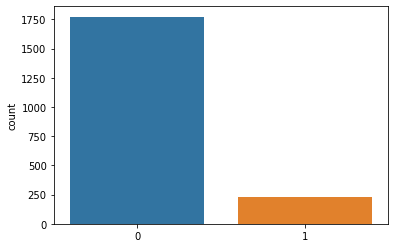

In [136]:
sns.countplot(rf_base_predicted)

## Q54

In [138]:
confusion_matrix(y_test_1,rf_base_predicted)

array([[1549,   46],
       [ 224,  181]], dtype=int64)

In [139]:
print('Accuracy=',accuracy_score(y_test_1,rf_base_predicted))
print('F1 score=',f1_score(y_test_1,rf_base_predicted))
print('Precision=',precision_score(y_test_1,rf_base_predicted))
print('Recall=',recall_score(y_test_1,rf_base_predicted))

Accuracy= 0.865
F1 score= 0.5727848101265823
Precision= 0.7973568281938326
Recall= 0.4469135802469136


In [140]:
rf_base_acc=accuracy_score(y_test_1,rf_base_predicted)
rf_base_f1 =f1_score(y_test_1,rf_base_predicted)
rf_base_pre=precision_score(y_test_1,rf_base_predicted)
rf_base_rec=recall_score(y_test_1,rf_base_predicted)

# Visualization

## Q55

In [142]:
typeModel=['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression',
           'K-NN','K-NN','K-NN','K-NN',
           'SVM','SVM','SVM','SVM',
           'Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes',
           'Decision Tree','Decision Tree','Decision Tree','Decision Tree',
           'Random Forest','Random Forest','Random Forest','Random Forest']

score=['Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall']

value=[lr_base_acc,lr_base_f1,lr_base_pre,lr_base_rec,
       knn_base_acc,knn_base_f1,knn_base_pre,knn_base_rec,
       svc_base_acc,svc_base_f1,svc_base_pre,svc_base_rec,
       nb_base_acc,nb_base_f1,nb_base_pre,nb_base_rec,
       dt_base_acc,dt_base_f1,dt_base_pre,dt_base_rec,
       rf_base_acc,rf_base_f1,rf_base_pre,rf_base_rec]
df_matrix=pd.DataFrame(np.arange(0,24))
df_matrix['Model']=typeModel
df_matrix['Score']=score
df_matrix['Value']=value

In [143]:
df_matrix

0                Model      Score     Value
0    0  Logistic Regression   Accuracy  0.797500
1    1  Logistic Regression   F1 score  0.000000
2    2  Logistic Regression  Precision  0.000000
3    3  Logistic Regression     Recall  0.000000
4    4                 K-NN   Accuracy  0.781000
5    5                 K-NN   F1 score  0.087500
6    6                 K-NN  Precision  0.280000
7    7                 K-NN     Recall  0.051852
8    8                  SVM   Accuracy  0.797500
9    9                  SVM   F1 score  0.000000
10  10                  SVM  Precision  0.000000
11  11                  SVM     Recall  0.000000
12  12          Naive Bayes   Accuracy  0.789500
13  13          Naive Bayes   F1 score  0.188825
14  14          Naive Bayes  Precision  0.429825
15  15          Naive Bayes     Recall  0.120988
16  16        Decision Tree   Accuracy  0.785000
17  17        Decision Tree   F1 score  0.473039
18  18        Decision Tree  Precision  0.469586
19  19        Decision Tree     Recall  0.476543
20  20        Random Forest   Accuracy  0.865000
21  21        Random Forest   F1 score  0.572785
22  22        Random Forest  Precision  0.797357
23  23        Random Forest     Recall  0.446914

In [144]:
import plotly.express as px
fig = px.bar(df_matrix, x='Model', color="Score",
             y='Value',
             title="Score of each model",
             barmode='group',
             height=600
            )

fig.show()

## SVM (Normalized)

## Q56

In [145]:
svc_norm=SVC()

In [146]:
min_max_1=MinMaxScaler()

In [151]:
data_norm=min_max_1.fit_transform(x_1)

In [152]:
df_norm=pd.DataFrame(data_norm,columns=df_dummied.columns[:-1]) # don't want the last two columns
df_norm

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.505353  0.545455     0.2  0.000000            0.0        1.0   
1        0.481799  0.522727     0.1  0.334031            0.0        0.0   
2        0.254818  0.545455     0.8  0.636357            0.8        1.0   
3        0.676660  0.477273     0.1  0.000000            0.4        0.0   
4        1.000000  0.568182     0.2  0.500246            0.0        1.0   
...           ...       ...     ...       ...            ...        ...   
9995     0.830835  0.477273     0.5  0.000000            0.4        1.0   
9996     0.284797  0.386364     1.0  0.228657            0.0        1.0   
9997     0.698073  0.409091     0.7  0.000000            0.0        0.0   
9998     0.832976  0.545455     0.3  0.299226            0.4        1.0   
9999     0.875803  0.227273     0.4  0.518708            0.0        1.0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                1.0         0.506735               1.0                0.0   
1                1.0         0.562709               0.0                0.0   
2                0.0         0.569654               1.0                0.0   
3                0.0         0.469120               1.0                0.0   
4                1.0         0.395400               0.0                0.0   
...              ...              ...               ...                ...   
9995             0.0         0.481341               1.0                0.0   
9996             1.0         0.508490               1.0                0.0   
9997             1.0         0.210390               1.0                0.0   
9998             0.0         0.464429               0.0                1.0   
9999             0.0         0.190914               1.0                0.0   

      Geography_Spain  Gender_Female  Gender_Male  
0                 0.0            1.0          0.0  
1                 1.0            1.0          0.0  
2                 0.0            1.0          0.0  
3                 0.0            1.0          0.0  
4                 1.0            1.0          0.0  
...               ...            ...          ...  
9995              0.0            0.0          1.0  
9996              0.0            0.0          1.0  
9997              0.0            1.0          0.0  
9998              0.0            0.0          1.0  
9999              0.0            1.0          0.0  

[10000 rows x 13 columns]

In [154]:
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(df_norm,y_1,test_size=0.2,random_state=13)

In [155]:
print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [156]:
svc_norm.fit(x_train_2,y_train_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
svc_norm_predicted=svc_norm.predict(x_test_2)

## Q57

<AxesSubplot:ylabel='count'>

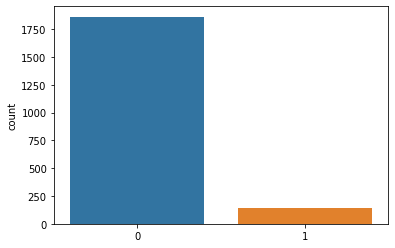

In [158]:
sns.countplot(svc_norm_predicted)

## Q58

In [159]:
confusion_matrix(y_test_2,svc_norm_predicted)

array([[1578,   17],
       [ 283,  122]], dtype=int64)

In [161]:
svc_norm_acc=accuracy_score(y_test_2,svc_norm_predicted)
svc_norm_f1 =f1_score(y_test_2,svc_norm_predicted)
svc_norm_pre=precision_score(y_test_2,svc_norm_predicted)
svc_norm_rec=recall_score(y_test_2,svc_norm_predicted)
print('Accuracy=',accuracy_score(y_test_2,svc_norm_predicted))
print('F1 score=',f1_score(y_test_2,svc_norm_predicted))
print('Precision=',precision_score(y_test_2,svc_norm_predicted))
print('Recall=',recall_score(y_test_2,svc_norm_predicted))

Accuracy= 0.85
F1 score= 0.44852941176470595
Precision= 0.8776978417266187
Recall= 0.3012345679012346


# SVM (GridSearch)

In [163]:
param_combination = {'C': [0.01,0.1,1,10,100,100,1000,10000],'gamma': [0.00001,0.0001,0.001,0.01,0.1,1,10]}

In [164]:
svc_grid=GridSearchCV(SVC(),param_combination,verbose=1)

In [166]:
svc_grid.fit(x_train_2,y_train_2)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  8.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [167]:
svc_grid.best_params_

{'C': 10000, 'gamma': 0.01}

In [168]:
svc_grid_predicted=svc_grid.predict(x_test_2)

## Q60

<AxesSubplot:ylabel='count'>

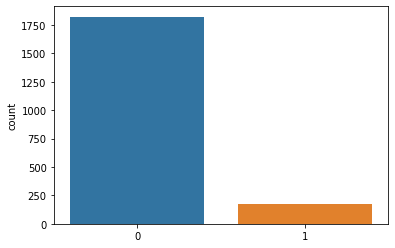

In [169]:
sns.countplot(svc_grid_predicted)

## Q61

In [170]:
confusion_matrix(y_test_2,svc_grid_predicted)

array([[1563,   32],
       [ 260,  145]], dtype=int64)

In [171]:
svc_grid_acc=accuracy_score(y_test_2,svc_grid_predicted)
svc_grid_f1 =f1_score(y_test_2,svc_grid_predicted)
svc_grid_pre=precision_score(y_test_2,svc_grid_predicted)
svc_grid_rec=recall_score(y_test_2,svc_grid_predicted)
print('Accuracy=', svc_grid_acc)
print('F1 score=', svc_grid_f1)
print('Precision=',svc_grid_pre)
print('Recall=',   svc_grid_rec)

Accuracy= 0.854
F1 score= 0.49828178694158076
Precision= 0.8192090395480226
Recall= 0.35802469135802467


# Random Forest (GridSearch)

## Q62

In [172]:
param_combination = { 'max_depth' : [2,4,8,16,32,64,'none'],
                      'min_samples_leaf': [1,2,4,8,16,32],
                      'n_estimators': [10,20,50,100,500]}

In [173]:
rf_grid=GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [174]:
rf_grid.fit(x_train_2,y_train_2)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_s

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score o

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score o

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score o

C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\boont\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score o

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [175]:
rf_grid_predicted=rf_grid.predict(x_test_2)

## Q63

<AxesSubplot:ylabel='count'>

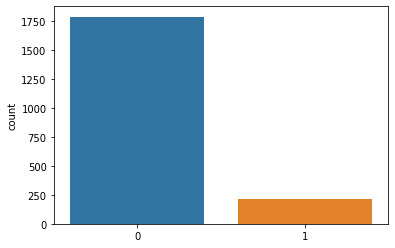

In [176]:
sns.countplot(rf_grid_predicted)

## Q64

In [178]:
confusion_matrix(y_test_2,rf_grid_predicted)

array([[1554,   41],
       [ 231,  174]], dtype=int64)

In [179]:
rf_grid_acc=accuracy_score(y_test_2,rf_grid_predicted)
rf_grid_f1 =f1_score(y_test_2,rf_grid_predicted)
rf_grid_pre=precision_score(y_test_2,rf_grid_predicted)
rf_grid_rec=recall_score(y_test_2,rf_grid_predicted)
print('Accuracy=', rf_grid_acc)
print('F1 score=', rf_grid_f1)
print('Precision=',rf_grid_pre)
print('Recall=',   rf_grid_rec)

Accuracy= 0.864
F1 score= 0.5612903225806453
Precision= 0.8093023255813954
Recall= 0.42962962962962964


In [180]:
typeModel=['Logistic Regression','Logistic Regression','Logistic Regression','Logistic Regression',
           'K-NN','K-NN','K-NN','K-NN',
           'SVM','SVM','SVM','SVM',
           'Naive Bayes','Naive Bayes','Naive Bayes','Naive Bayes',
           'Decision Tree','Decision Tree','Decision Tree','Decision Tree',
           'Random Forest','Random Forest','Random Forest','Random Forest',
           'SVM (normalized)','SVM (normalized)','SVM (normalized)','SVM(normalized)',
           'SVM (gridSearch)','SVM (gridSearch)','SVM (gridSearch)','SVM(gridSearch)',
           'Random Forest (gridSearch)','Random Forest (gridSearch)','Random Forest (gridSearch)','Random Forest (gridSearch)']

score=['Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall',
       'Accuracy','F1 score','Precision','Recall']

value=[lr_base_acc,lr_base_f1,lr_base_pre,lr_base_rec,
       knn_base_acc,knn_base_f1,knn_base_pre,knn_base_rec,
       svc_base_acc,svc_base_f1,svc_base_pre,svc_base_rec,
       nb_base_acc,nb_base_f1,nb_base_pre,nb_base_rec,
       dt_base_acc,dt_base_f1,dt_base_pre,dt_base_rec,
       rf_base_acc,rf_base_f1,rf_base_pre,rf_base_rec,
       svc_norm_acc,svc_norm_f1,svc_norm_pre,svc_norm_rec,
       svc_grid_acc,svc_grid_f1,svc_grid_pre,svc_grid_rec,
       rf_grid_acc,rf_grid_f1,rf_grid_pre,rf_grid_rec]
df_matrix=pd.DataFrame(np.arange(0,36))
df_matrix['Model']=typeModel
df_matrix['Score']=score
df_matrix['Value']=value

In [183]:
import plotly.express as px
fig = px.bar(df_matrix[df_matrix.Score=='Accuracy'], x='Model',
             y='Value',
             title="Accuracy Score of each model",
             barmode='group',
             height=600
            )

fig.show()

## Q66

In [184]:
import plotly.express as px
fig = px.bar(df_matrix[df_matrix.Score=='F1 score'], x='Model',
             y='Value',
             title="F1 Score of each model",
             barmode='group',
             height=600
            )

fig.show()

## Q67

In [187]:
import plotly.express as px
fig = px.bar(df_matrix[df_matrix.Score=='Precision'], x='Model',
             y='Value',
             title="Precision Score of each model",
             barmode='group',
             height=600
            )

fig.show()

## Q68

In [188]:
import plotly.express as px
fig = px.bar(df_matrix[df_matrix.Score=='Recall'], x='Model',
             y='Value',
             title="Recall Score of each model",
             barmode='group',
             height=600
            )

fig.show()